In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [2]:
dataset_red=pd.read_csv("Data/红酒白酒分类+回归（都可以）/winequality-red.csv",sep=";",index_col=False)
dataset_white=pd.read_csv("Data/红酒白酒分类+回归（都可以）/winequality-white.csv",sep=";",index_col=False)


In [3]:
red=["red"]*len(dataset_red)
dataset_red.insert(0,"Label",red)
white=["white"]*len(dataset_white)
dataset_white.insert(0,"Label",white)
dataset=pd.concat([dataset_red,dataset_white],axis=0)
dataset.set_index("Label")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Label,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6


In [4]:
sns.pairplot(dataset, hue='Label')

Error in callback <function flush_figures at 0x000002AE0C37F288> (for post_execute):


KeyboardInterrupt: 

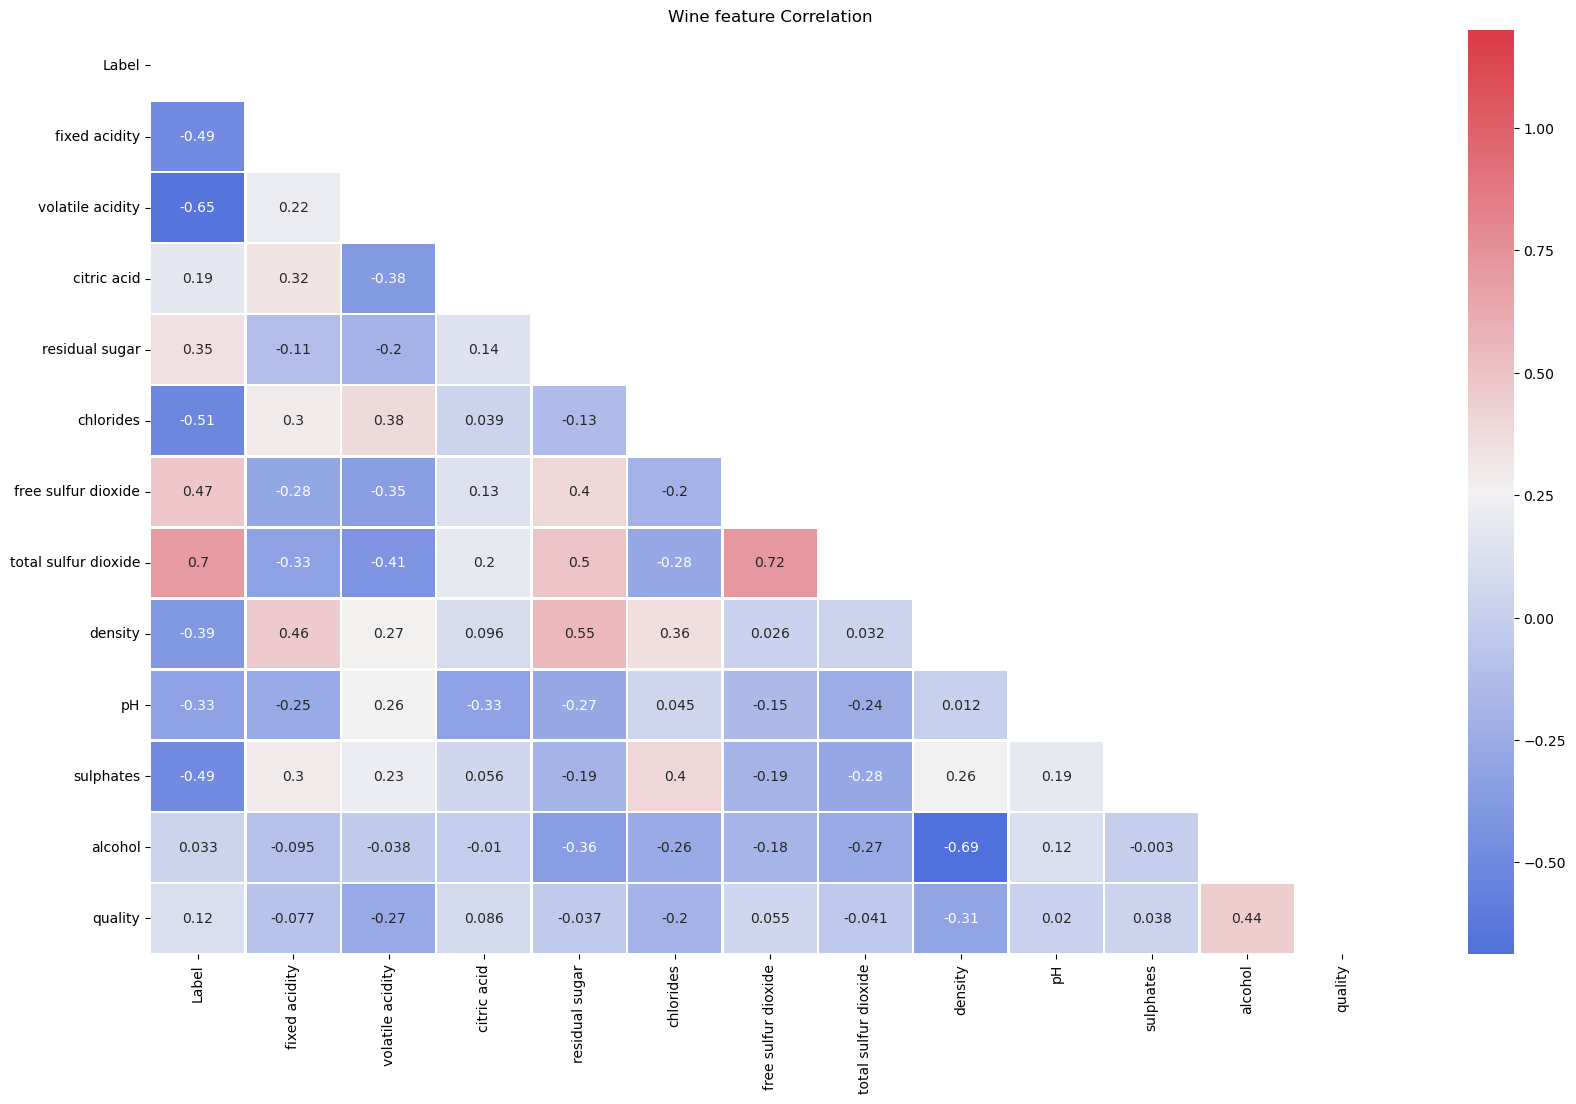

In [18]:
import numpy as np
corrMatt = dataset.corr()
# print(corrMatt)  相关矩阵

mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Wine feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [5]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Label"]=le.fit_transform(dataset["Label"])
y = dataset["Label"]
X = dataset.drop('Label',axis=1)

#split the dataset into trainning set and testing set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [6]:
#Normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm = norm.fit(X_train)
Xn_train = norm.transform(X_train)
Xn_test = norm.transform(X_test)
Xn_train

array([[0.05967993, 0.00586853, 0.        , ..., 0.00397866, 0.10841854,
        0.03978662],
       [0.04699018, 0.00321512, 0.00302963, ..., 0.00234951, 0.07295844,
        0.04328043],
       [0.03191258, 0.00151165, 0.00205752, ..., 0.00180558, 0.03863102,
        0.02099512],
       ...,
       [0.03199445, 0.00172668, 0.00264081, ..., 0.00223453, 0.04875344,
        0.02539242],
       [0.0379148 , 0.00167271, 0.00183998, ..., 0.0031224 , 0.05464192,
        0.02787853],
       [0.04219343, 0.00210967, 0.00140645, ..., 0.00227195, 0.05896261,
        0.03245649]])

In [7]:
#Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif,k=4)
Xnf_train = selector.fit_transform(Xn_train,y_train)
Xnf_test = selector.transform(Xn_test)

In [8]:
from sklearn.svm import SVC
clf=SVC(C=0.8,kernel="rbf",degree=3,gamma='auto',probability=True)
clf.fit(Xnf_train,y_train)

SVC(C=0.8, gamma='auto', probability=True)

In [8]:
classifier_score=clf.score(Xnf_test,y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))


The classifier accuracy score is 0.92


In [9]:
# K fold validation
from sklearn.model_selection import cross_val_score
y_predict=clf.predict(Xnf_test)
cross_val_score(clf, Xnf_train, y_train, cv=5, scoring='f1_macro')

array([0.86297003, 0.87523287, 0.81701303, 0.84888264, 0.86804301])